In [11]:
from Entities.database.Skill import get_skill_aggregate_hiscore
from Entities.helpers.SkillMod import DF_Levels, DF_Skill_Ratio
activity = 'Fishing'
df, formatter = get_skill_aggregate_hiscore(activity)


df = DF_Skill_Ratio(df)
df.describe(include='bool')

,Banned
count,500
unique,2
top,False
freq,416


# Performance

The PCA not including minigames has a higher recall for Banned class

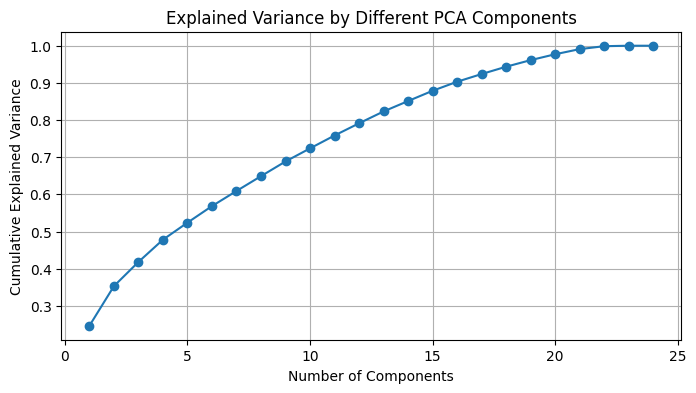

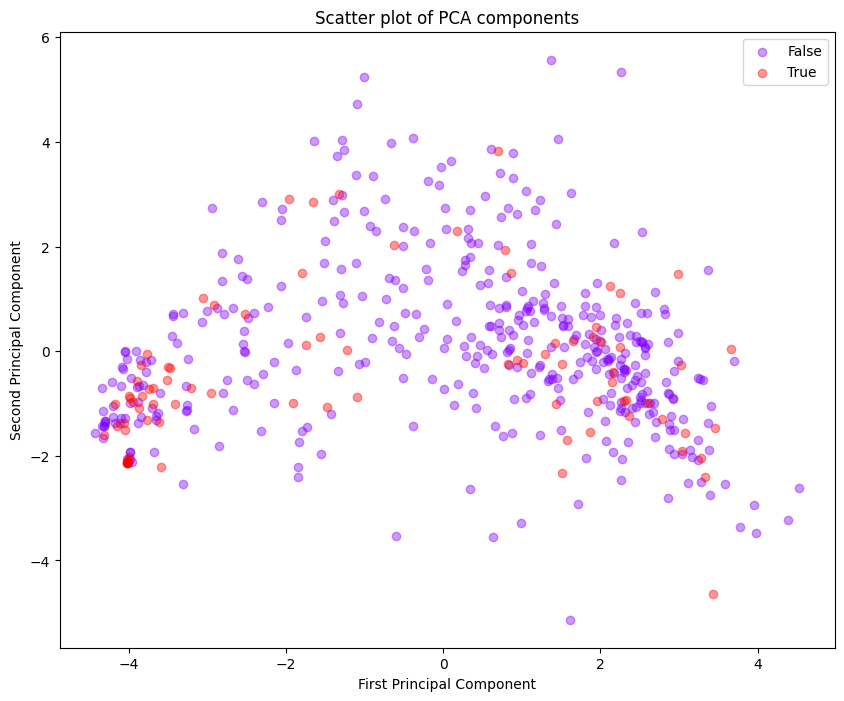

In [9]:
from Entities.features.Pca import Pca

pca = Pca(df=df, 
          skills=formatter.get_skill_names(), 
          minigames = None, # formatter.get_minigame_names(), 
          n_components=None)
pca.run()
pca.elbow_plot()
pca.plot()

In [12]:
from Entities.Models.RF import rf_model
from Entities.helpers.sampling import undersample

UNDERSAMPLE = False

if UNDERSAMPLE:
    undersampled_df = undersample(df)
    class_weights = None
else:
    banned_count = len(df[df['Banned'] == True])
    unbanned_count = len(df[df['Banned'] == False])
    
    class_weights = {0: unbanned_count, 1: banned_count}


rf_model(pca.X_r, pca.y, class_weights, threshold=0.5)

Weights: {0: 416, 1: 84}
Accuracy: 0.84
Confusion Matrix:
 [[79  3]
 [13  5]]
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.96      0.91        82
        True       0.62      0.28      0.38        18

    accuracy                           0.84       100
   macro avg       0.74      0.62      0.65       100
weighted avg       0.82      0.84      0.81       100

ROC-AUC Score: 0.61
